In [1]:
import numpy as np 
import pandas as pd 
import os 
import gc 
import matplotlib.pyplot as plt 
import seaborn as sns
import math
import sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
df = pd.read_csv(r"C:\Users\mihir\titanic.csv")
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [5]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [6]:
# Find length of NaN values in Age
len(np.argwhere(np.isnan(df["Age"])))

C:\Users\mihir\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


0

In [7]:
# Find length of the column "Age"
len(df["Age"])

887

In [8]:
# View the NaN in Age for Female-Sex
female_age = df[df["Sex"] == "female"]["Age"]

In [9]:
female_age

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
876    25.0
878    22.0
881    39.0
883    19.0
884     7.0
Name: Age, Length: 314, dtype: float64

In [10]:
# View the NaN in Age for Male-Sex
male_age = df[df["Sex"] == "male"]["Age"]

In [11]:
male_age

0      22.0
4      35.0
5      27.0
6      54.0
7       2.0
       ... 
879    28.0
880    25.0
882    27.0
885    26.0
886    32.0
Name: Age, Length: 573, dtype: float64

In [12]:
# Store median value into variable
female_median = female_age.median()
male_median = male_age.median()

In [14]:
# Assign age and sex into lists
age = list(df["Age"])
sex = list(df["Sex"])

In [15]:

# Run loop to replace the NaN values with the median value of the column
# The NaN values in female ages are replaced by the median of the female ages
# The NaN values in male ages are replaced by the median of the male ages

for i in range (len(age)):
    if (math.isnan(age[i]) and sex[i] == "male"):
        age[i] = male_median
        
    elif (math.isnan(age[i]) and sex[i] == "female"):
        age[i] = female_median

In [16]:
# Replace the Age and Sex columns with new updated ones without NaNs
(df["Age"]) = age
(df["Sex"]) = sex

In [18]:
# View the updated Age of female-Sex
df[df["Sex"] == "female"]["Age"]

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
876    25.0
878    22.0
881    39.0
883    19.0
884     7.0
Name: Age, Length: 314, dtype: float64

In [19]:
# View the updated Age of male-Sex
df[df["Sex"] == "male"]["Age"]

0      22.0
4      35.0
5      27.0
6      54.0
7       2.0
       ... 
879    28.0
880    25.0
882    27.0
885    26.0
886    32.0
Name: Age, Length: 573, dtype: float64

IndexError: list index out of range

In [22]:
del df["Name"]

In [23]:
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [24]:
# Convert string values to int values for the ease of prediction
df = pd.get_dummies(df)

In [25]:
df.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


In [26]:
# View data - ready for training and testing
pd.isnull(df).sum()

Survived                   0
Pclass                     0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
Sex_female                 0
Sex_male                   0
dtype: int64

In [27]:
X = df.iloc[:,1:]
Y = df["Survived"]
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.2)

In [28]:
len(X_train)

709

In [29]:
len(X_test)

178

In [30]:
len(Y_train)

709

In [31]:
len(Y_test)

178

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [33]:
# LDA applied to train data
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,Y_train)
predictions_lda = lda.predict(X_test)

C:\Users\mihir\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [34]:
# Print Accuracy Score for LDA
print("Accuracy Score is:")
print(accuracy_score(Y_test, predictions_lda))
print()


Accuracy Score is:
0.8146067415730337



In [35]:
# Classification Report of Prediction
print("Classification Report:")
print(classification_report(Y_test, predictions_lda))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       116
           1       0.75      0.71      0.73        62

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.81      0.81      0.81       178



In [36]:
# Confusion Matrix for predictions made
conf2 = confusion_matrix(Y_test,predictions_lda)
conf2

array([[101,  15],
       [ 18,  44]], dtype=int64)

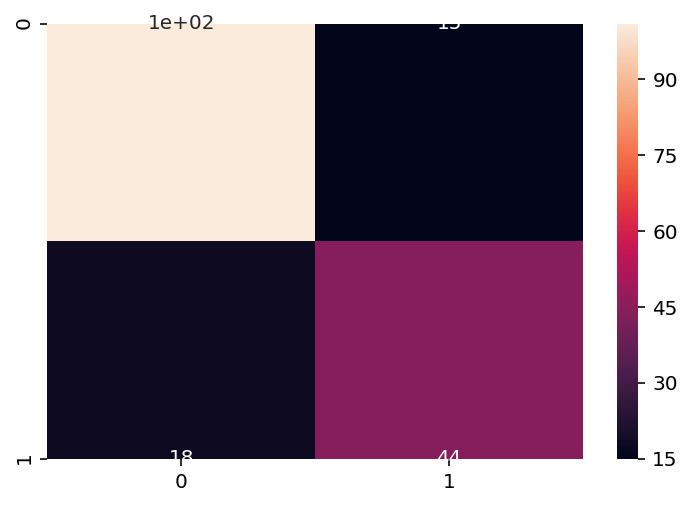

In [38]:
# Plot Confusion Matrix
label = ["0","1"]
sns.heatmap(conf2, annot=True, xticklabels=label, yticklabels=label)